In [4]:
import cv2
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

In [5]:
# files = glob('/Volumes/Extreme Pro/datasets/vggface/test/**/*.jpg', recursive=True)
identities = glob('/Volumes/Extreme Pro/datasets/vggface/VGG_ALL_FRONTAL/**')

In [6]:
load = []
for r in range(6):
    for i in identities:
        face = glob(i + '/*jpg')[0]
        load.append(face)

In [7]:
len(load)

15324

In [8]:
def load_img(filepath:os.PathLike):
    img = cv2.imread(filepath)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
main_tensor = np.ndarray(shape=(len(load), 128**2), dtype=np.float64)

for idx, file in enumerate(load):
    img = load_img(file)
    img = img.flatten()
    main_tensor[idx] = img

In [10]:
main_tensor.shape

(15324, 16384)

In [11]:
mean_face = main_tensor.mean(axis=0)

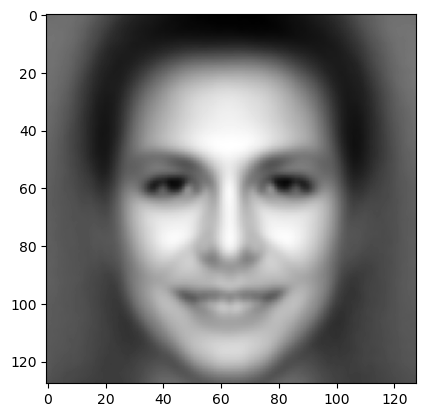

In [12]:
plt.imshow(mean_face.reshape(128, 128), cmap='gray')

In [15]:
normalized_faces = main_tensor - mean_face

In [17]:
covariance = np.cov(normalized_faces)/normalized_faces.shape[0]


In [18]:
e_vals, e_vecs = np.linalg.eig(covariance)

In [24]:
sort_ind = e_vals.argsort()

In [26]:
var_cmp_sum = np.cumsum(e_vals)

array([2554, 2558, 2556, 2555, 2578, 2577, 2566, 2565, 2570, 2569, 2605,
       2604, 2601, 2590, 2589, 2611, 2610, 2641, 2586, 2585, 2640, 2639,
       2613, 2612, 2651])

Cumulative proportion of variance explained vector: 
[0.21349905+0.j 0.30057391+0.j 0.36869703+0.j ... 1.        +0.j
 1.        +0.j 1.        +0.j]


/Users/josephbajor/mambaforge/envs/dl/lib/python3.10/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


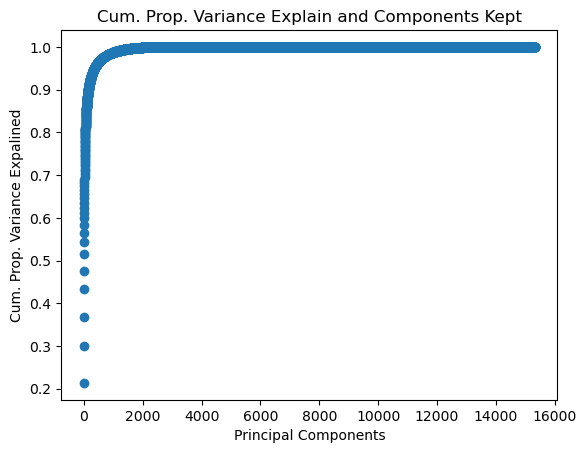

In [29]:
eig_pairs = [(e_vals[index], e_vecs[:,index]) for index in range(len(e_vals))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(e_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(e_vals))]


var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()